In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://datahack-prod.s3.ap-south-1.amazonaws.com/workshop_train_file/train_gbW7HTd.csv")
df.head(10)

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,6,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,7,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,8,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,9,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,10,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [3]:
df.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [4]:
df.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


# get a list of categorical variables

In [5]:
cat_variable = df.dtypes.loc[df.dtypes == 'object'].index
print(cat_variable)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [6]:
df[cat_variable].apply(lambda x : len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

## time to analyse univariate

# 1)Analysis of Race 

In [7]:
#counting the number of race
df['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [8]:
#taking the number of percentage
df['Race'].value_counts()/df.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

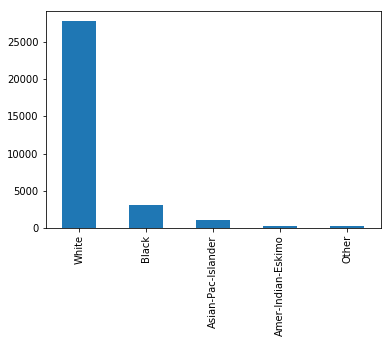

In [9]:
plt.figure(figsize = (6,4))
df['Race'].value_counts().plot(kind = 'bar')
plt.show()

# Analysis of Native country

In [10]:
#count of Native.country
df['Native.Country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [11]:
df['Native.Country'].value_counts()/df.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

# Analysis of Occupation

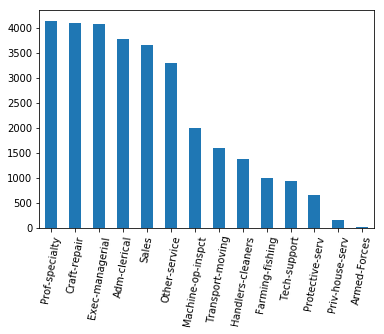

In [12]:
x = df['Occupation'].value_counts()
x.plot(kind = 'bar',rot = 80)
plt.show()

# Analysis of mariatal Status

In [13]:
df['Marital.Status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital.Status, dtype: int64

In [14]:
# percentage of marital status
df['Marital.Status'].value_counts()/df.shape[0]

Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: Marital.Status, dtype: float64

In [15]:

dict1 = {'<=50K':0,'>50K':1}
y_avay =df['Income.Group'].map(dict1)
y_avay.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: Income.Group, dtype: int64

# Time to do multivariate analysis

In [16]:
#we look at the cross-tabulation or confusion matrix of the two variables. This can be done using crosstab function of Pandas.
ct = pd.crosstab(df['Sex'],df['Income.Group'],margins = True)
print(ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


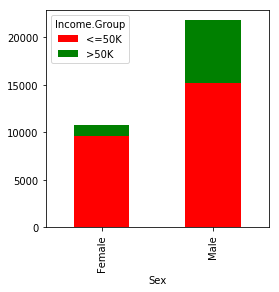

In [17]:
ct.iloc[:-1,:-1].plot(kind = 'bar',stacked = True,color = ['red','green','blue'],figsize = (4,4))
plt.show()

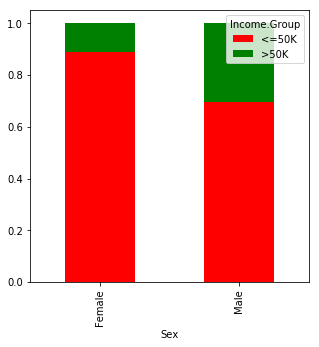

In [18]:
#Though important, absolute numbers might not be very intuitive to interpret. 
#Next lets try to plot the percentage of females and males in each income group.
def percent_convert(ser):
    return ser/float(ser[-1])
ct1 = ct.apply(percent_convert , axis =1)
ct1.iloc[:-1,:-1].plot(kind = 'bar',stacked = True,color = ['red','green','blue'],figsize = (5,5),grid = False)
plt.show()

In [19]:
df2 = df
df2['income'] = y_avay

# Both Continuous variable

In [20]:
print(ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


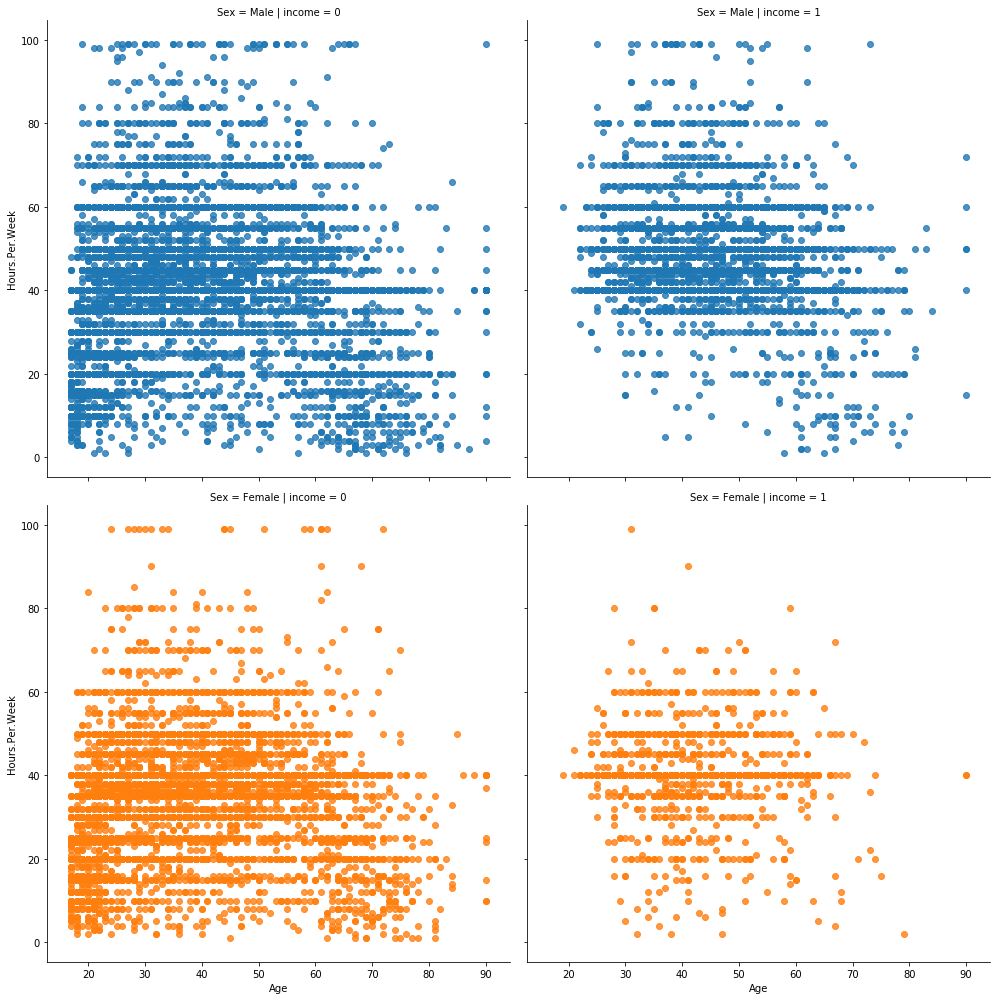

In [21]:
sns.lmplot('Age','Hours.Per.Week',data = df2,size = 7,fit_reg = False,col = 'income',row = 'Sex',hue = 'Sex')
plt.show()

# Continuous - Categorical variable

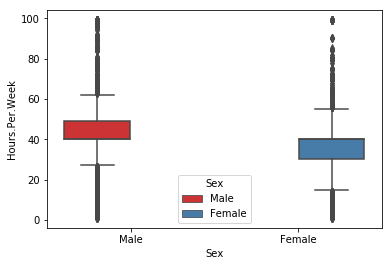

In [22]:
sns.boxplot(y= 'Hours.Per.Week',x = 'Sex',hue = 'Sex',data = df2,palette="Set1")
plt.show()

In [23]:
#sns.swarmplot(y= 'Hours.Per.Week',x = 'Sex',hue = 'Sex',data = df2,palette="Set1")
#plt.show()

# Missing Value Treatment

In [24]:
#checking missing value in each column
df.apply(lambda x: x.isnull().sum())

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
income               0
dtype: int64

In [25]:
df['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [26]:
#####################
#Lets check the missing value for test data set
#####################

test = pd.read_csv("https://datahack-prod.s3.ap-south-1.amazonaws.com/workshop_test_file/test_2AFBew7.csv")
test.apply(lambda x: x.isnull().sum())

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
ID                32561 non-null int64
Age               32561 non-null int64
Workclass         30725 non-null object
Education         32561 non-null object
Marital.Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Hours.Per.Week    32561 non-null int64
Native.Country    31978 non-null object
Income.Group      32561 non-null object
income            32561 non-null int64
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [28]:
# we can se Workclass,Occupation and Native.Country and categorical and have missing value

In [29]:
#starting with Workclass
from scipy import stats

In [30]:
missing_category = ['Workclass','Occupation','Native.Country']
for i in missing_category:
    df[i].fillna(df[i].mode()[0],inplace = True)
    test[i].fillna(test[i].mode()[0],inplace = True)

In [31]:
#checking the missing value after filling nan value
df.apply(lambda x: x.isnull().sum())

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
income            0
dtype: int64

In [32]:
test.apply(lambda x: x.isnull().sum())

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64

# Outlier Treatment

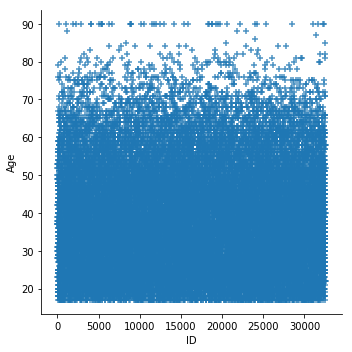

In [33]:
%matplotlib inline
sns.lmplot(x = 'ID',y='Age',data = df,fit_reg = False, markers = '+')

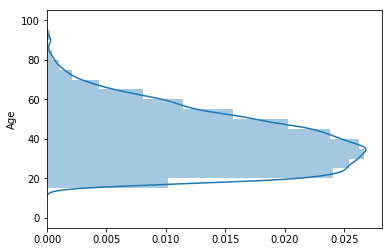

In [34]:
sns.distplot(df['Age'],bins = np.linspace(0,100,21),vertical = True)

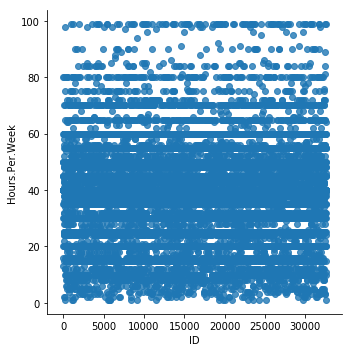

In [35]:
sns.lmplot(x = 'ID',y='Hours.Per.Week',data = df,fit_reg = False, markers = 'o')

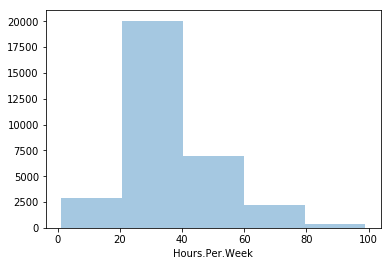

In [36]:
sns.distplot(df['Hours.Per.Week'],bins = 5,kde = False)

# Variable Transformation

In [37]:
#lets again check the datatypes
df.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
income             int64
dtype: object

In [38]:
df.apply(lambda x: len(x.value_counts()))

ID                32561
Age                  73
Workclass             8
Education            16
Marital.Status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Hours.Per.Week       94
Native.Country       41
Income.Group          2
income                2
dtype: int64

In [39]:
#going first to Workclass
(df['Workclass'].value_counts()/df.shape[0])*100

Private             75.341666
Self-emp-not-inc     7.803814
Local-gov            6.427935
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
Without-pay          0.042996
Never-worked         0.021498
Name: Workclass, dtype: float64

In [40]:
#now we will combine the groups that are less than 5% and replace with 'others'
class_to_combine = ['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']
for i in class_to_combine:
    df['Workclass'].replace({i:'others'},inplace = True)
    test['Workclass'].replace({i:'others'},inplace = True)

In [41]:
#lets again watch the Workclass
(df['Workclass'].value_counts()/df.shape[0])*100

Private             75.341666
others              10.426584
Self-emp-not-inc     7.803814
Local-gov            6.427935
Name: Workclass, dtype: float64

# time to combine the rest

## step 1->make the list of rest 

In [42]:
#lets know about the different index of df.dtypes.index are the column name(here) and there value are the type of dtyeps
df.dtypes.index

Index(['ID', 'Age', 'Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Hours.Per.Week', 'Native.Country',
       'Income.Group', 'income'],
      dtype='object')

In [43]:
#lets take out the dtype which are of object type
object_category = list(df.dtypes.loc[df.dtypes == 'object'])
print(object_category)
print("\n *) but we want the list of those dtypes which are indexed by there name,hence we will use .index\n")
object_category = list(df.dtypes.loc[df.dtypes == 'object'].index)
print(object_category)

[dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')]

 *) but we want the list of those dtypes which are indexed by there name,hence we will use .index

['Workclass', 'Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group']


In [44]:
#excluding the 'Workclass'
object_category = object_category[1:]
print(object_category)

['Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group']


In [45]:
#lets check the count of different value in each category
df[object_category].apply(lambda x: len(x.value_counts()))

Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

## step 2->running a loop over these value and combine categories 

In [46]:
for column in object_category:
    #finding the category to combine
    percent_category = df[column].value_counts()/df.shape[0]
    category_to_combine = percent_category.loc[percent_category.values < 0.05].index
    
    #now replace the category less than 5 percent with 'others'
    for cat in category_to_combine:
        df[column].replace({cat:'others'},inplace = True)
        test[column].replace({cat:'others'},inplace = True)

In [47]:
#lets check again for test data
df[object_category].apply(lambda x: len(x.value_counts()))

Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64

In [48]:
#for test data
test[object_category[:-1]].apply(lambda x: len(x.value_counts()))

Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
dtype: int64

## Predective Modeling

Since this is a classification problem, we can start with various models like logistic regression, naive bayes, decision trees, etc. 
For modeling using sklearn in Pandas, we have to adopt the following steps:<br>
->1)Data Preprocessing: sklearn accepts only numeric data so we've to convert text to numbers<br>
->2)Training model: fit the model on training data<br>
->3)Making predictions: use the model to make predictions on test data<br>
->4)Analyze results: compare the train and test accuracy and derive insights required to improve the model.<br>
Lets go through these one by one.

## Step 1-> Data Processing
sklearn provides a function LabelEncoder for converting categories to numbers in range 0,1..(N-1) where N is the number of categories.

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
object_category = list(df.dtypes.loc[df.dtypes == 'object'].index)
print(object_category)

['Workclass', 'Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group']


In [51]:
le = LabelEncoder()
for var in object_category:
    df[var] = le.fit_transform(df[var])
for var in object_category[:-1]:
    test[var] = le.fit_transform(test[var])    
    

In [52]:
df.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group,income
0,1,39,3,0,2,0,1,1,1,40,0,0,0
1,2,50,2,0,1,2,0,1,1,13,0,0,0
2,3,38,1,1,0,7,1,1,1,40,0,0,0
3,4,53,1,4,1,7,0,0,1,40,0,0,0
4,5,28,1,0,1,5,4,0,0,40,1,0,0


In [53]:
test.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,32562,25,1,4,2,3,2,0,1,40,0
1,32563,38,1,1,1,7,0,1,1,50,0
2,32564,28,0,4,1,7,0,1,1,40,0
3,32565,44,1,3,1,3,0,0,1,40,0
4,32566,18,1,3,2,5,2,1,0,30,0


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
y = df['income']
X = df.drop(['income','Income.Group'],axis = 1)

In [57]:
X.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,1,39,3,0,2,0,1,1,1,40,0
1,2,50,2,0,1,2,0,1,1,13,0
2,3,38,1,1,0,7,1,1,1,40,0
3,4,53,1,4,1,7,0,0,1,40,0
4,5,28,1,0,1,5,4,0,0,40,1


In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26048, 11)
(6513, 11)
(26048,)
(6513,)


In [59]:
model1 = LogisticRegression()
clf = model1.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.764471057884


In [60]:
clf.score(X,y)

0.76806609133626114

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
clf2 = DecisionTreeClassifier(max_depth = 10,max_features = 'sqrt',min_samples_leaf = 100).fit(X,y)
clf2.score(X_test,y_test)

0.81037924151696605

In [63]:
ans1 = pd.DataFrame(data =clf.predict(test),index = test['ID'],columns = ['Income.Group'])

In [64]:
ans1 = ans1.replace({0:'<=50K',1:'>50K'})

In [65]:
ans1.head()

,Income.Group
ID,
32562,<=50K
32563,<=50K
32564,<=50K
32565,<=50K
32566,<=50K


In [66]:
ans1.to_csv('ans_workshop1.csv')

In [67]:
ans2 = pd.DataFrame(data =clf2.predict(test),index = test['ID'],columns = ['Income.Group']).replace({0:'<=50K',1:'>50K'})

In [68]:
print(ans2.head())

      Income.Group
ID                
32562        <=50K
32563        <=50K
32564        <=50K
32565        <=50K
32566        <=50K


In [69]:
ans2.to_csv('ans_workshop2.csv')

In [70]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10,100,100]}
clf_cv = GridSearchCV(LogisticRegression(),param_grid = param_grid)
clf_cv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [73]:
clf_cv.best_params_

{'C': 0.1}

In [74]:
clf_cv.score(X_test,y_test)

0.7564870259481038

In [75]:
from sklearn.svm import SVC 

In [76]:
clf3 = SVC().fit(X_train,y_train)
clf3.score(X_test,y_test)

0.75633348687240898